2.3.0
                                       current_state  action    reward  \
0  [0.17353821 0.5415482  0.29216576 0.7187171  0...       1 -0.342552   
1  [0.18029785 0.50944406 0.30904198 0.71955454 0...       1 -0.035077   
2  [0.18029785 0.49408603 0.3052349  0.7196104  0...       6 -0.137431   
3  [1.8705750e-01 4.8596662e-01 3.0982018e-01 7.2...       1 -0.217199   
4  [0.15322876 0.5585258  0.31119537 0.7192754  0...       6 -0.463287   

                                          next_state  total_reward   done  \
0  [0.17353821 0.5415482  0.29216576 0.7187171  0...     -0.342552  False   
1  [0.18029785 0.50944406 0.30904198 0.71955454 0...     -0.377629  False   
2  [0.18029785 0.49408603 0.3052349  0.7196104  0...     -0.515060  False   
3  [1.8705750e-01 4.8596662e-01 3.0982018e-01 7.2...     -0.732259  False   
4  [0.15322876 0.5585258  0.31119537 0.7192754  0...     -1.195546  False   

   policy_type  episode  
0            0        0  
1            0        0  
2       

/Users/schr476/opt/anaconda3/envs/hep_accelerator/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


-30.82063003511023


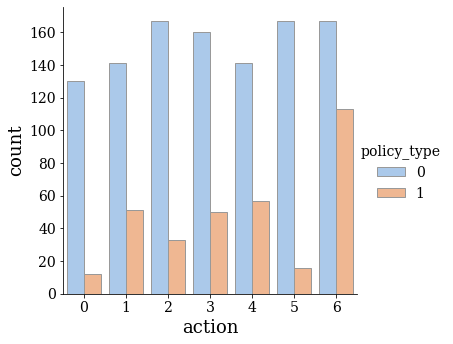

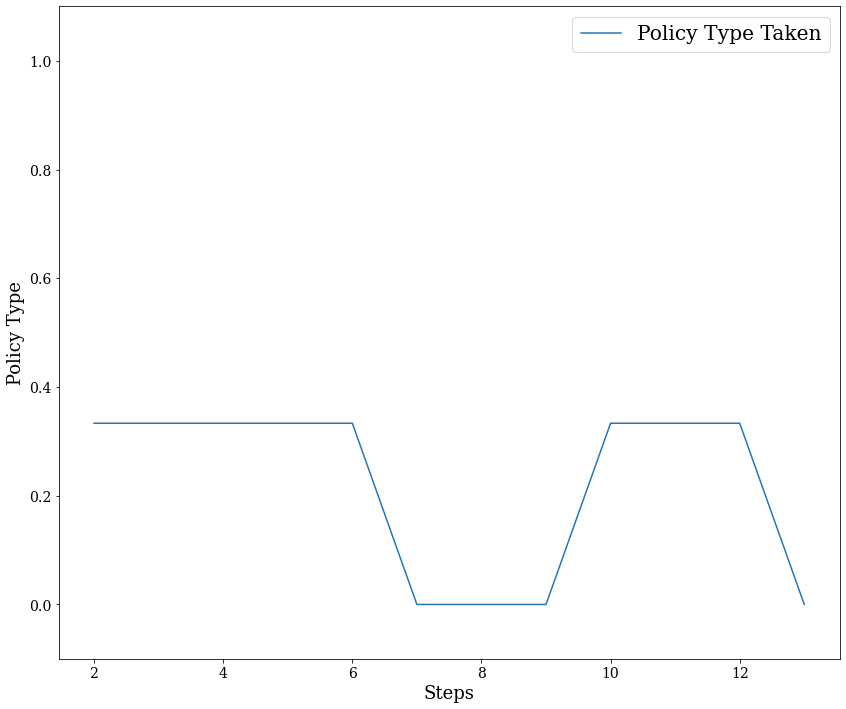

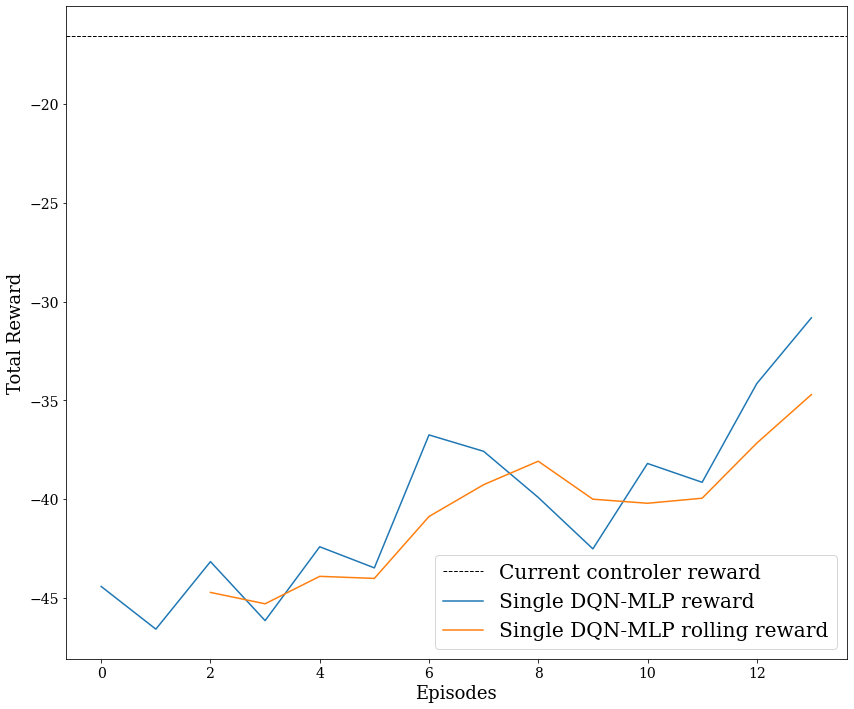

In [150]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'regular'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.rcParams['font.family'] = [u'serif']
plt.rcParams['font.size'] = 14

## Using DataAnalysis notbook
step100_mean = -17.65001875
step100_std  = 1.553729686751266
##
step100_mean = -16.5585471875
step100_std =  6.60839952001191

## READ data 
import pandas as pd
import numpy as np
import math, sys
dir_name = '../drivers/results_dqn_surrogate3_D10062020-T215348_v1/'
dir_name = '../drivers/results_dqn_surrogatev3_ensemble1_nmodels10_D10072020-T133849_v1/'
dir_name = '../drivers/results_dqn_surrogate3c_D10082020-T150610_v1/'
dir_name = '../drivers/results_dqn_surrogate3d_D10082020-T181328_v1/'
#results_dqn_D10052020-T123954_v1/'#drivers/results_dqn_09292020_5to2_v1/'#/results_dqn_ensemble_v2/'
#dir_name = '../drivers/results_dqn_ensemble_v2/'
#dir_name = '../drivers/results_dqn_ensemble_v1/'
#filename1 = dir_name+'data_accelerator_lstm_episode10000_steps50_batched_memories_0602420_v1.log'
#filename1 = dir_name+'/2_data_accelerator_lstm_episode5000_steps45_batched_memories_09022020_v1.log'#2_data_accelerator_lstm_episode5000_steps100_batched_memories_0602420_v1.log'
filename1 = dir_name+'fnal_surrogate_dqn_mlp_episodes500_steps100_09292020_5to2_batched_memories.log'
filename1 = dir_name+'fnal_surrogate_dqn_mlp_episodes500_steps100_D10052020-T123954_batched_memories.log'
filename1 = dir_name+'fnal_surrogate_dqn_mlp_episodes500_steps100_D10062020-T112143_batched_memories.log'
filename1 = dir_name+'fnal_surrogate_dqn_mlp_episodes500_steps100_D10062020-T215348_batched_memories.log'
filename1 = dir_name+'fnal_surrogatev3_dqn_ensemble1_nmodels10_mlp_episodes500_steps100_D10072020-T133849_batched_memories.log'
filename1 = dir_name+'fnal_surrogate_dqn_mlp_episodes500_steps100_D10082020-T150610_batched_memories.log'
filename1 = dir_name+'fnal_surrogate_dqn_mlp_episodes50_steps100_D10082020-T181328_batched_memories.log'

#filename1 = dir_name+'fnal_surrogate_dqn_ensemble2_mlp_episodes500_steps100_09092020b_batched_memories.log'
#filename1 = dir_name+'fnal_surrogate_dqn_ensemble1_mlp_episodes500_steps100_09092020b_batched_memories.log'
frame = pd.read_csv(filename1, sep=' ',
                 header=None, names=['current_state', 'action', 'reward','next_state', 'total_reward','done','policy_type','episode'])

print(frame.head())

##
import seaborn as sns
#fig,ax = plt.subplots(figsize=(14,12))
#sns.lineplot(x = "step", y = "action", data = frame, hue = "action")
#sns.boxplot(frame['action'])
#sns.distplot(frame['action'],hue=frame['policy_type'])
sns.catplot(ax=ax,x="action", hue="policy_type", kind="count",
            palette="pastel", edgecolor=".6",
            data=frame)
#plt.plot(frame['action'],label='Action Taken')
#ax.set_ylabel('Fraction')
#ax.set_xlabel('Action')
#plt.legend(fontsize='x-large')
#plt.show()

##
frame = frame[frame.done==True] 
frame = frame.reset_index()
print(frame['total_reward'].max())
## rolling averages ##
rolling_setting = 3
frame['policy_type_roll'] = frame['policy_type'].rolling(rolling_setting).mean()
frame['total_reward_roll'] = frame['total_reward'].rolling(rolling_setting).mean()


## Plot all action types ##
fig,ax = plt.subplots(1, 1,figsize=(14,12))
plt.plot(frame['policy_type_roll'].interpolate(method='cubic'),label='Policy Type Taken')
ax.set_xlabel('Steps')
ax.set_ylabel('Policy Type')
plt.ylim(-0.1,1.1)
plt.legend(fontsize='x-large')
plt.show()



## Print total reward ##
#frame_done = frame[frame.done==True] 
#frame_done = frame_done.reset_index()
#print(frame_done.total_reward_roll)
#frame_done.total_reward.plot()
fig,ax = plt.subplots(1, 1,figsize=(14,12))
#ax.fill_between(frame['episode'], step100_mean-2*step100_std, step100_mean+2*step100_std, label='2 sigma range', color='green', alpha=0.75)
#ax.fill_between(frame['episode'], step100_mean-step100_std, step100_mean+step100_std,label='1 sigma range', color='yellow', alpha=0.75)
plt.axhline(y=step100_mean, lw=1,ls='--',color='black', linestyle='-', label='Current controler reward')
plt.plot(frame['total_reward'],label='Single DQN-MLP reward')
plt.plot(frame['total_reward_roll'],label='Single DQN-MLP rolling reward')
frame['total_reward_diff'] = frame['total_reward_roll']-frame['total_reward']
#ax.fill_between(frame['episode'], frame['total_reward_roll']-abs(frame['total_reward_diff']), 
#                frame['total_reward_roll']+abs(frame['total_reward_diff']),
#                label='1 sigma range', color='red', alpha=0.75)
#ax.set_xlabel('Steps')
#ax.set_ylabel('Policy Type')
#plt.xlim(0,195)
#plt.ylim(-16,0)
plt.legend(fontsize='x-large')
#fig,ax = plt.subplots(1, 1,figsize=(14,12))
#plt.plot(frame.total_reward_roll, label='Total Reward')
ax.set_xlabel('Episodes')
ax.set_ylabel('Total Reward')
plt.show()



In [117]:
import numpy as np
pre = 0.
new = 0.
reward1 = -abs(new-pre)
reward2 = -1 + 1.*math.exp(-5*abs(-0.2))
print(reward1)
print(reward2)

-0.0
-0.6321205588285577
